In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
tf.logging.set_verbosity(tf.logging.WARN)

In [90]:
# paths variaveis estaticas
PATH_FILES = 'inputs/'
PATH_OUTPUTS = 'outputs/'
imgs_inputs = [PATH_FILES+'baboon.png', PATH_FILES+'monalisa.png', PATH_FILES+'peppers.png', PATH_FILES+'watch.png']

# K Means - Usando o Tensorflow

In [97]:
def k_means_tensorflow(filename, num_clusters, num_iterations):
    # leitura da imagem
    img = cv2.imread(filename)
    # muda a imagem para ser uma matriz de tres colunas
    img_data = img.reshape((-1, 3))
    
    # cria o objeto kmeans com o num de clusters indicado
    kmeans = tf.contrib.factorization.KMeansClustering(num_clusters=num_clusters, use_mini_batch=False)
    
    # define uma funcao do lambda que sera chamada no treinamento do modelo
    train = lambda: tf.train.limit_epochs(tf.convert_to_tensor(img_data, dtype=tf.float32), num_epochs=1)
    
    # train
    previous_centers = None
    for _ in range(num_iterations):
        kmeans.train(train)
        cluster_centers = kmeans.cluster_centers()
        previous_centers = cluster_centers
        
    cluster_indices = list(kmeans.predict_cluster_index(train))
    
    img_output = cluster_centers[cluster_indices].reshape((-1, 3))
    img_output = img_output.reshape(img.shape)
    
    return img_output

## Primeiro teste: Cluster: 16 e Iterações: 10

In [98]:
imgs_outputs = []
for img in imgs_inputs:
    imgs_outputs.append(k_means_tensorflow(img, 16, 10))

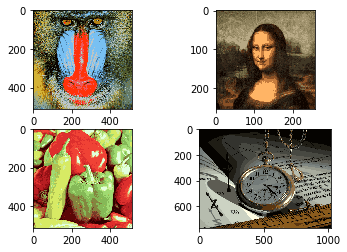

In [134]:
plt.subplot(221), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[0], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(222), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[1], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(223), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[2], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(224), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[3], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))

plt.show()

In [143]:
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(16)+'-'+str(10)+'-'+imgs_inputs[0][imgs_inputs[0].find('/')+1:], imgs_outputs[0])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(16)+'-'+str(10)+'-'+imgs_inputs[1][imgs_inputs[1].find('/')+1:], imgs_outputs[1])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(16)+'-'+str(10)+'-'+imgs_inputs[2][imgs_inputs[2].find('/')+1:], imgs_outputs[2])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(16)+'-'+str(10)+'-'+imgs_inputs[3][imgs_inputs[3].find('/')+1:], imgs_outputs[3])

True

### Segundo teste: Cluster: 16 e Iterações: 50

In [144]:
imgs_outputs = []
for img in imgs_inputs:
    imgs_outputs.append(k_means_tensorflow(img, 16, 50))

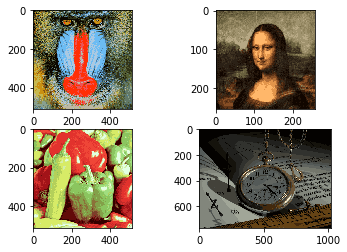

In [145]:
plt.subplot(221), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[0], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(222), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[1], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(223), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[2], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(224), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[3], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))

plt.show()

In [146]:
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(16)+'-'+str(50)+'-'+imgs_inputs[0][imgs_inputs[0].find('/')+1:], imgs_outputs[0])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(16)+'-'+str(50)+'-'+imgs_inputs[1][imgs_inputs[1].find('/')+1:], imgs_outputs[1])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(16)+'-'+str(50)+'-'+imgs_inputs[2][imgs_inputs[2].find('/')+1:], imgs_outputs[2])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(16)+'-'+str(50)+'-'+imgs_inputs[3][imgs_inputs[3].find('/')+1:], imgs_outputs[3])

True

## Terceiro teste: Cluster: 32 e Iterações: 10

In [147]:
imgs_outputs = []
for img in imgs_inputs:
    imgs_outputs.append(k_means_tensorflow(img, 32, 10))

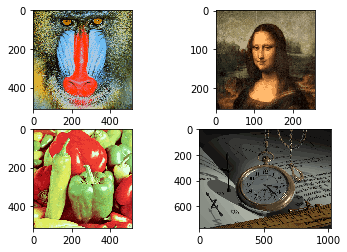

In [148]:
plt.subplot(221), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[0], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(222), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[1], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(223), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[2], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(224), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[3], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))

plt.show()

In [149]:
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(32)+'-'+str(10)+'-'+imgs_inputs[0][imgs_inputs[0].find('/')+1:], imgs_outputs[0])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(32)+'-'+str(10)+'-'+imgs_inputs[1][imgs_inputs[1].find('/')+1:], imgs_outputs[1])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(32)+'-'+str(10)+'-'+imgs_inputs[2][imgs_inputs[2].find('/')+1:], imgs_outputs[2])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(32)+'-'+str(10)+'-'+imgs_inputs[3][imgs_inputs[3].find('/')+1:], imgs_outputs[3])

True

## Quarto teste: Cluster: 32 e Iterações: 50

In [150]:
imgs_outputs = []
for img in imgs_inputs:
    imgs_outputs.append(k_means_tensorflow(img, 32, 50))

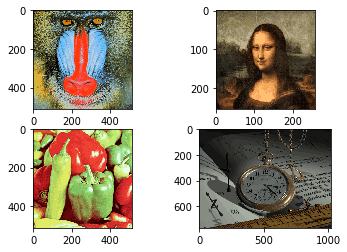

In [151]:
plt.subplot(221), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[0], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(222), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[1], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(223), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[2], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(224), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[3], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))

plt.show()

## Quinto teste: Cluster: 64 e Iterações: 10

In [153]:
imgs_outputs = []
for img in imgs_inputs:
    imgs_outputs.append(k_means_tensorflow(img, 64, 10))

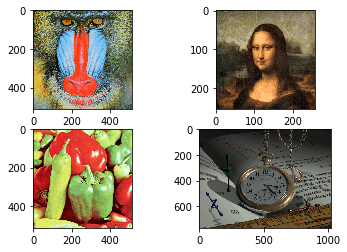

In [154]:
plt.subplot(221), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[0], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(222), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[1], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(223), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[2], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(224), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[3], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))

plt.show()

In [155]:
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(64)+'-'+str(10)+'-'+imgs_inputs[0][imgs_inputs[0].find('/')+1:], imgs_outputs[0])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(64)+'-'+str(10)+'-'+imgs_inputs[1][imgs_inputs[1].find('/')+1:], imgs_outputs[1])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(64)+'-'+str(10)+'-'+imgs_inputs[2][imgs_inputs[2].find('/')+1:], imgs_outputs[2])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(64)+'-'+str(10)+'-'+imgs_inputs[3][imgs_inputs[3].find('/')+1:], imgs_outputs[3])

True

## Sexto teste: Cluster: 64 e Iterações: 50

In [156]:
imgs_outputs = []
for img in imgs_inputs:
    imgs_outputs.append(k_means_tensorflow(img, 64, 50))

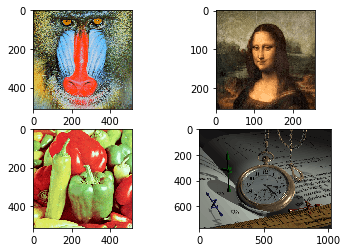

In [157]:
plt.subplot(221), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[0], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(222), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[1], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(223), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[2], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(224), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[3], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))

plt.show()

In [158]:
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(64)+'-'+str(50)+'-'+imgs_inputs[0][imgs_inputs[0].find('/')+1:], imgs_outputs[0])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(64)+'-'+str(50)+'-'+imgs_inputs[1][imgs_inputs[1].find('/')+1:], imgs_outputs[1])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(64)+'-'+str(50)+'-'+imgs_inputs[2][imgs_inputs[2].find('/')+1:], imgs_outputs[2])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(64)+'-'+str(50)+'-'+imgs_inputs[3][imgs_inputs[3].find('/')+1:], imgs_outputs[3])

True

## Sétimo teste: Cluster: 128 e Iterações: 10

In [159]:
imgs_outputs = []
for img in imgs_inputs:
    imgs_outputs.append(k_means_tensorflow(img, 128, 10))

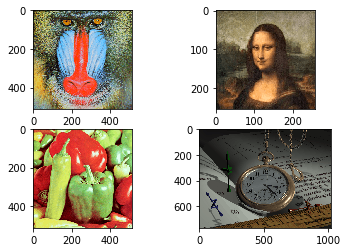

In [160]:
plt.subplot(221), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[0], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(222), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[1], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(223), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[2], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(224), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[3], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))

plt.show()

In [161]:
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(128)+'-'+str(10)+'-'+imgs_inputs[0][imgs_inputs[0].find('/')+1:], imgs_outputs[0])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(128)+'-'+str(10)+'-'+imgs_inputs[1][imgs_inputs[1].find('/')+1:], imgs_outputs[1])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(128)+'-'+str(10)+'-'+imgs_inputs[2][imgs_inputs[2].find('/')+1:], imgs_outputs[2])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(128)+'-'+str(10)+'-'+imgs_inputs[3][imgs_inputs[3].find('/')+1:], imgs_outputs[3])

True

## Oitavo teste: Cluster: 128 e Iterações: 50

In [162]:
imgs_outputs = []
for img in imgs_inputs:
    imgs_outputs.append(k_means_tensorflow(img, 128, 50))

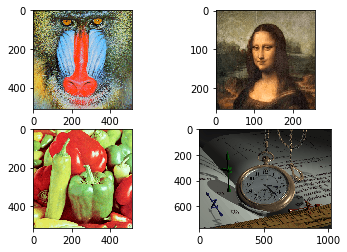

In [163]:
plt.subplot(221), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[0], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(222), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[1], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(223), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[2], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))
plt.subplot(224), plt.imshow(cv2.normalize(cv2.cvtColor(imgs_outputs[3], cv2.COLOR_BGR2RGB),  None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U))

plt.show()

In [164]:
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(128)+'-'+str(50)+'-'+imgs_inputs[0][imgs_inputs[0].find('/')+1:], imgs_outputs[0])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(128)+'-'+str(50)+'-'+imgs_inputs[1][imgs_inputs[1].find('/')+1:], imgs_outputs[1])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(128)+'-'+str(50)+'-'+imgs_inputs[2][imgs_inputs[2].find('/')+1:], imgs_outputs[2])
cv2.imwrite(PATH_OUTPUTS+'/tensorflow/'+str(128)+'-'+str(50)+'-'+imgs_inputs[3][imgs_inputs[3].find('/')+1:], imgs_outputs[3])

True